## Dimensionement à la flexion 


base de donné liée a la flexion 

source : Lignum 

In [27]:
import math

# Propriétés des matériaux (incluant bois massif et bois lamellé-collé)
materiaux = {
    # Bois massif
    "C16": {"fc_0_k": 9.5, "fm_k": 9.5, "E_0_mean": 8000, "E_0_05": 5400},
    "C24": {"fc_0_k": 12.0, "fm_k": 14.0, "E_0_mean": 11000, "E_0_05": 7400},
    "C30": {"fc_0_k": 13.5, "fm_k": 17.5, "E_0_mean": 12000, "E_0_05": 8000},
    "D30": {"fc_0_k": 13.0, "fm_k": 17.0, "E_0_mean": 10000, "E_0_05": 7000},
    
    # Bois lamellé-collé
    "GL24k": {"fc_0_k": 14.5, "fm_k": 16.0, "E_0_mean": 11000, "E_0_05": 9000},
    "GL24h": {"fc_0_k": 14.5, "fm_k": 16.0, "E_0_mean": 11000, "E_0_05": 9000},
    "GL28k": {"fc_0_k": 16.0, "fm_k": 18.5, "E_0_mean": 12000, "E_0_05": 10400},
    "GL28h": {"fc_0_k": 16.0, "fm_k": 18.5, "E_0_mean": 12000, "E_0_05": 10400},
    "GL32k": {"fc_0_k": 17.5, "fm_k": 21.0, "E_0_mean": 13000, "E_0_05": 11200},
    "GL32h": {"fc_0_k": 17.5, "fm_k": 21.0, "E_0_mean": 13000, "E_0_05": 11200},
}

def calculer_flexion(M_ed, b, h, materiau, eta_t=1.0, eta_w=1.0, type_bois="massif"):
    """
    Calcul de vérification à la flexion pour une section en bois.
    :param M_ed: Moment de flexion appliqué (kNm)
    :param b: Largeur de la section (mm)
    :param h: Hauteur de la section (mm)
    :param materiau: Type de matériau (ex: "C16", "C24", "GL24k", "GL32h")
    :param eta_t: Facteur de durée de charge
    :param eta_w: Facteur d'humidité
    :param type_bois: Type de bois ("massif" ou "lamellé-collé")
    :return: Dictionnaire des résultats
    """
    # Propriétés du matériau
    fm_k = materiaux[materiau]["fm_k"]  # Résistance à la flexion caractéristique
    A = b * h
    W = (b * h**2) / 6  # Module de flexion (section rectangulaire)

    # Contrainte de flexion
    sigma_m_d = (M_ed * 1e6) / W  # Convertir M_ed en N.mm pour cohérence

    # Résistance en flexion de conception
    fm_d = fm_k * eta_t * eta_w

    # Vérification
    verification = sigma_m_d <= fm_d

    # Résultats
    return {
        "sigma_m_d": sigma_m_d,
        "fm_d": fm_d,
        "W": W,
        "A": A,
        "verification": verification,
        "type_bois": type_bois
    }


# Rentrer les donnés selon sections standard 

ou autres si disponoible 

In [28]:
# Paramètres d'entrée pour le test
M_ed = 10  # Moment de flexion appliqué en kNm
b = 100  # Largeur de la section en mm
h = 200  # Hauteur de la section en mm
materiau = "GL24h"  # Matériau utilisé
type_bois = "lamellé-collé"  # Type de bois

# Calcul
resultats = calculer_flexion(M_ed, b, h, materiau, eta_t=1.0, eta_w=1.0, type_bois=type_bois)

# Affichage des résultats en français
print(f"Contrainte de flexion (σm,d) : {resultats['sigma_m_d']} N/mm²")
print(f"Résistance de conception en flexion (fm,d) : {resultats['fm_d']} N/mm²")
print(f"Module de flexion (W) : {resultats['W']} mm³")
print(f"Surface de la section (A) : {resultats['A']} mm²")
print(f"Type de bois : {resultats['type_bois']}")
print(f"Vérification réussie : {'Oui' if resultats['verification'] else 'Non'}")


Contrainte de flexion (σm,d) : 15.0 N/mm²
Résistance de conception en flexion (fm,d) : 16.0 N/mm²
Module de flexion (W) : 666666.6666666666 mm³
Surface de la section (A) : 20000 mm²
Type de bois : lamellé-collé
Vérification réussie : Oui


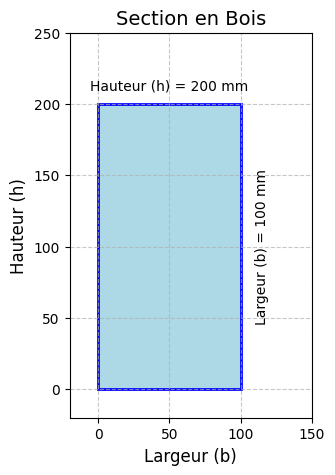

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def dessiner_section_boise(b, h):
    """
    Dessine une section rectangulaire de bois en fonction de ses dimensions.
    :param b: largeur en mm
    :param h: hauteur en mm
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    rect = patches.Rectangle((0, 0), b, h, linewidth=2, edgecolor='blue', facecolor='lightblue')

    # Ajouter le rectangle de bois
    ax.add_patch(rect)

    # Ajouter les dimensions
    plt.text(b / 2, h + 10, f"Hauteur (h) = {h} mm", ha='center', fontsize=10, color='black')
    plt.text(b + 10, h / 2, f"Largeur (b) = {b} mm", va='center', rotation=90, fontsize=10, color='black')

    # Ajuster les limites du graphique
    ax.set_xlim(-20, b + 50)
    ax.set_ylim(-20, h + 50)
    ax.set_aspect('equal', adjustable='box')
    
    # Ajouter des titres et étiquettes
    plt.title("Section en Bois", fontsize=14)
    plt.xlabel("Largeur (b)", fontsize=12)
    plt.ylabel("Hauteur (h)", fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    
    # Afficher le graphique
    plt.show()

dessiner_section_boise(b, h)


# Details de calcules 

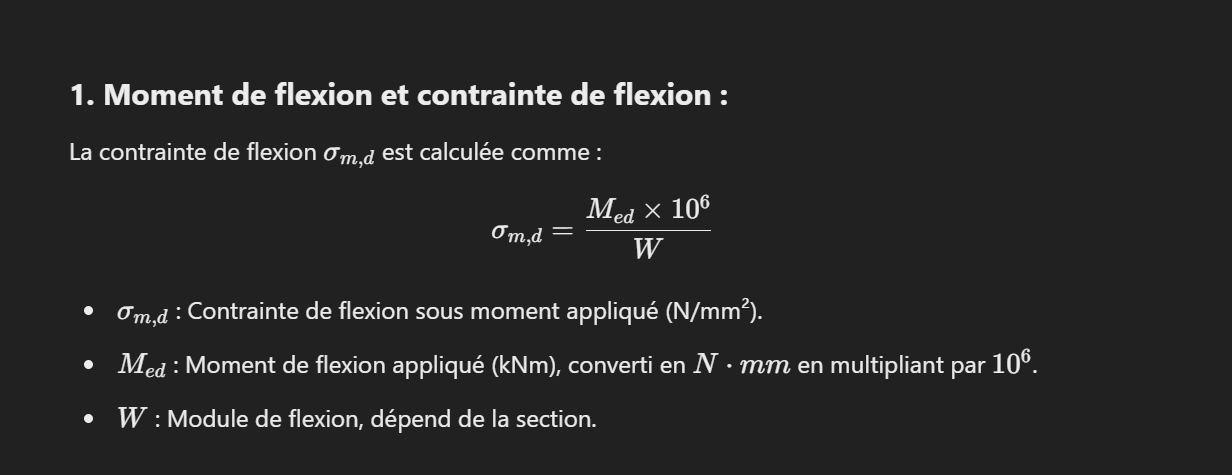
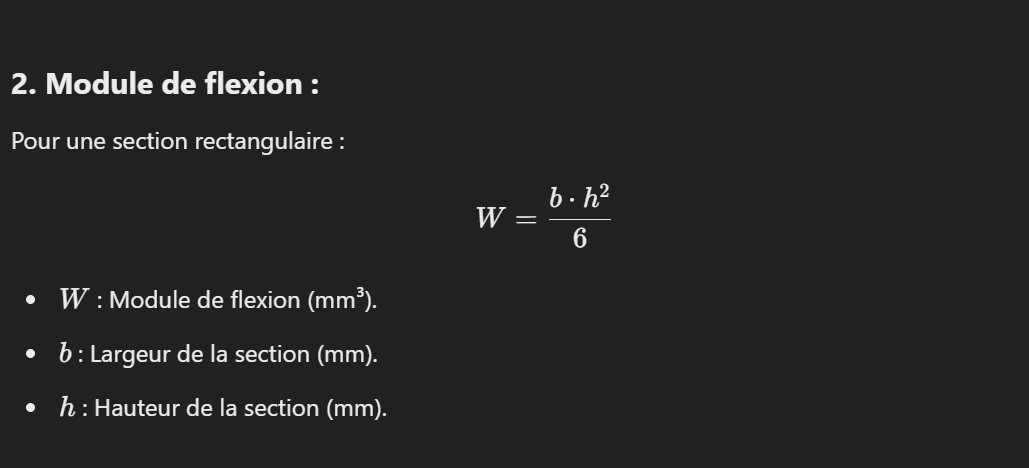
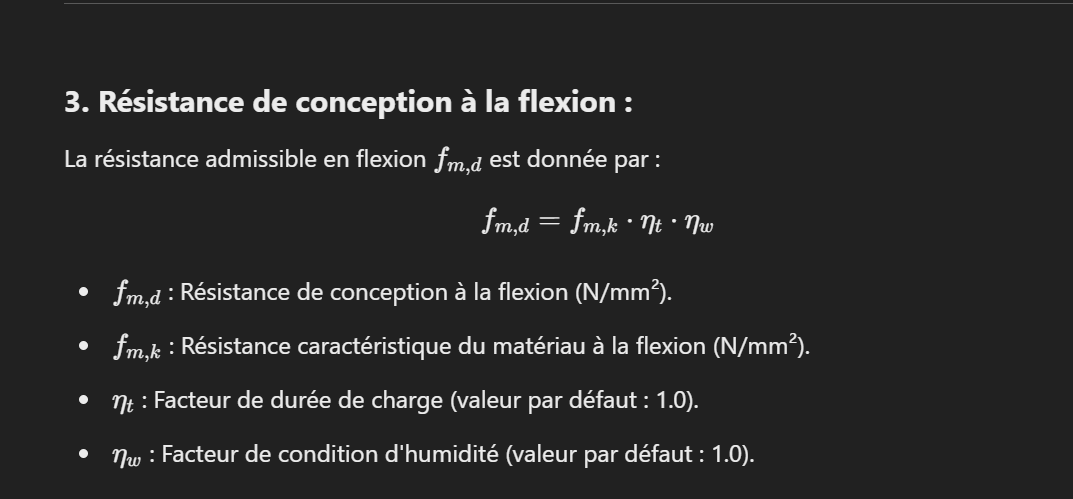
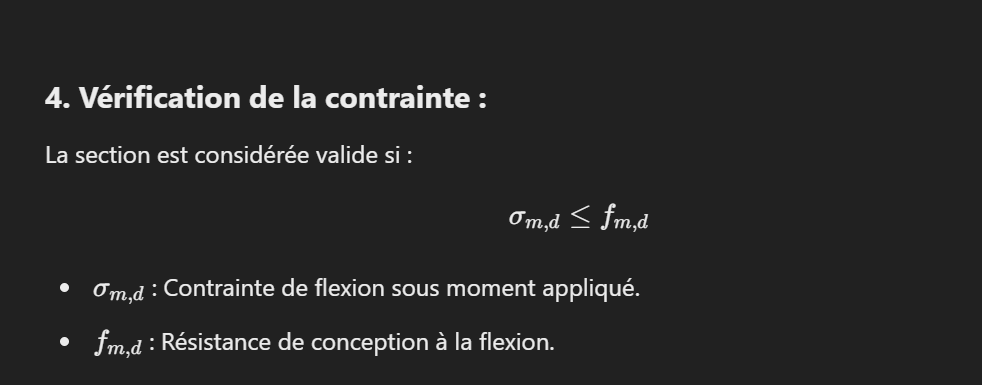
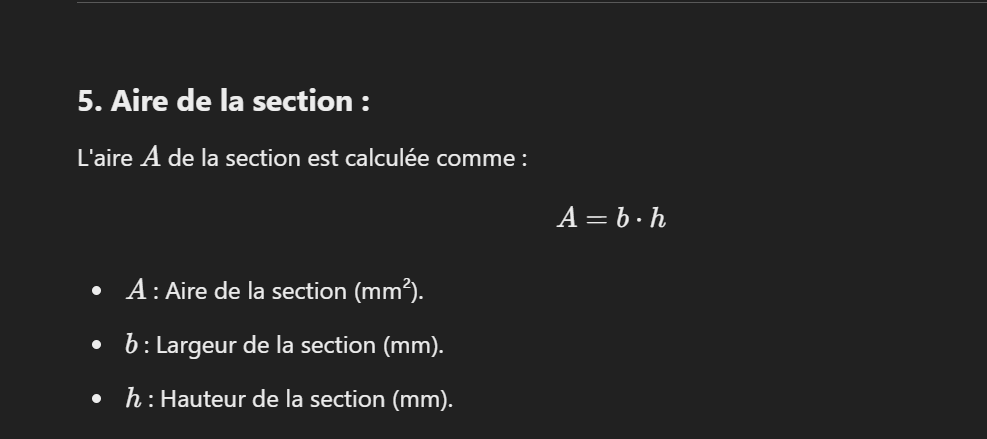
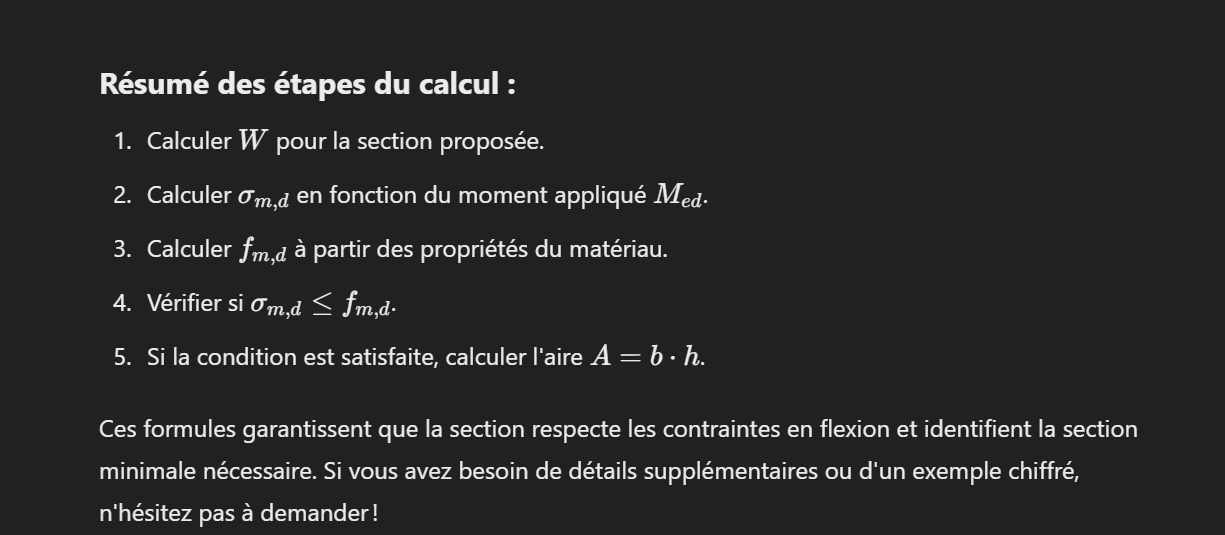

# Sections Minimums 

In [30]:
# Ajout du calcul de l'aire pour chaque section minimale
def trouver_section_minimale_flexion_par_material_avec_aire(M_ed, eta_t=1.0, eta_w=1.0):
    """
    Trouve la section minimale pour chaque matériau en flexion en utilisant les sections standardisées
    et calcule l'aire correspondante.
    :param M_ed: Moment de flexion appliqué (kNm)
    :param eta_t: Facteur durée charge
    :param eta_w: Facteur humidité
    :return: Dictionnaire {matériau: (largeur, hauteur, aire)} ou None si aucune ne passe
    """
    sections_minimales = {}
    for material, sections in sections_standard.items():
        materiau_props = materiaux[material]
        fm_k = materiau_props["fc_0_k"]  # Résistance à la flexion approximée par `fc_0_k`

        for b, heights in sections.items():
            for h in heights:
                W = (b * h**2) / 6  # Module de flexion (section rectangulaire)

                # Calcul des contraintes
                sigma_m_d = (M_ed * 1e6) / W  # Convertir M_ed en N.mm pour cohérence
                fm_d = fm_k * eta_t * eta_w

                # Vérification
                if sigma_m_d <= fm_d:
                    A = b * h  # Calcul de l'aire (mm²)
                    sections_minimales[material] = (b, h, A)
                    break
            if material in sections_minimales:
                break

    return sections_minimales


# Réintégration des données des matériaux et sections standardisées
materiaux = {
    "C16": {"fc_0_k": 9.5},
    "C24": {"fc_0_k": 12.0},
    "C30": {"fc_0_k": 13.5},
    "GL24h": {"fc_0_k": 14.5},
    "GL28h": {"fc_0_k": 16.0},
    "GL32h": {"fc_0_k": 17.5},
}

sections_standard = {
    "C16": {
        60: [100, 120, 140, 160, 180, 200],
        80: [100, 120, 140, 160, 180, 200, 220, 240],
        100: [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
        120: [120, 140, 160, 180, 200, 220, 240, 260, 280],
    },
    "C24": {
        60: [100, 120, 140, 160, 180, 200],
        80: [100, 120, 140, 160, 180, 200, 220, 240],
        100: [100, 120, 140, 160, 180, 200, 220, 240, 260, 280],
        120: [120, 140, 160, 180, 200, 220, 240, 260, 280],
    },
    "C30": {
        80: [120, 140, 160, 180, 200, 220, 240],
        100: [120, 140, 160, 180, 200, 220, 240, 260],
        120: [140, 160, 180, 200, 220, 240, 260, 280],
    },
    "GL24h": {
        100: [120, 140, 160, 180, 200, 220, 240, 260, 280],
        120: [140, 160, 180, 200, 220, 240, 260, 280],
        140: [160, 180, 200, 220, 240, 260, 280],
    },
    "GL28h": {
        120: [160, 180, 200, 220, 240, 260, 280],
        140: [180, 200, 220, 240, 260, 280, 300],
        160: [200, 220, 240, 260, 280, 300],
    },
    "GL32h": {
        140: [180, 200, 220, 240, 260, 280, 300],
        160: [200, 220, 240, 260, 280, 300],
        180: [220, 240, 260, 280, 300],
    },
}

# Paramètre pour le calcul
M_ed = 10  # Moment de flexion appliqué en kNm

# Calcul des sections minimales pour tous les matériaux en flexion avec l'aire
sections_minimales_flexion_avec_aire = trouver_section_minimale_flexion_par_material_avec_aire(M_ed)

# Affichage des sections minimales en flexion avec l'aire
for material, section in sections_minimales_flexion_avec_aire.items():
    if section:
        print(f"Section minimale pour le matériau {material} (flexion) : "
              f"Largeur = {section[0]} mm, Hauteur = {section[1]} mm, Aire = {section[2]} mm²")
    else:
        print(f"Aucune section valide trouvée pour le matériau {material} en flexion.")


Section minimale pour le matériau C16 (flexion) : Largeur = 100 mm, Hauteur = 260 mm, Aire = 26000 mm²
Section minimale pour le matériau C24 (flexion) : Largeur = 100 mm, Hauteur = 240 mm, Aire = 24000 mm²
Section minimale pour le matériau C30 (flexion) : Largeur = 80 mm, Hauteur = 240 mm, Aire = 19200 mm²
Section minimale pour le matériau GL24h (flexion) : Largeur = 100 mm, Hauteur = 220 mm, Aire = 22000 mm²
Section minimale pour le matériau GL28h (flexion) : Largeur = 120 mm, Hauteur = 180 mm, Aire = 21600 mm²
Section minimale pour le matériau GL32h (flexion) : Largeur = 140 mm, Hauteur = 180 mm, Aire = 25200 mm²
